# Covid-19 infección en Ecuador.
## Prueba Primer Interciclo
<ul>
    <li> Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
        <ul>
            <li>Investigar los datos de los paises contigados por COVID-19, especialmente de latinoamerica (menos Ecuador), deberán escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:
                <ul>
                    <li>Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).</li>
                    <li>Generar un modelo probabilistico con los datos.</li>
                    <li>Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones
                        <ul>
                            <li>Cual tiene una mejor prediccion</li>
                            <li>Ventajas y desventajas de los modelos.</li>
                            <li>Cual es el principal problema del modelo probabilistico</li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </li>
    <li>El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
        <ul>
            <li>Se debe establecer un modelo basado en modelos matematicos y probabilisticos.</li>
                    <li>El programa deberá generar gráficas que indiquen la ecuacion matematica y probabilistica de tendencias.</li>
            <li>Deben calcularse las siguientes métricas:
                <ul>
                    <li>
                        Total de infectados dentro de 7 dias (matematico y probabilistico).
                    </li>
                </ul>
            </li>
        </ul>
    </li>
</ul>
Finalmente, desarrollar dentor de un cuaderno de Jupyter Notebook, generar un PDF y subir al repositorio.

La fecha de entrega es 24/11/20 antes o igual de las 13:00.


# Implementación

In [110]:
%matplotlib inline  
from pylab import *  
import numpy as np
import pandas as pd
import sympy as sp

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv').fillna(0) # poniendo datos nan a cero
ndf= df.loc[(df['location'] == 'Puerto Rico') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
ndf1=ndf[['date','total_cases']]
x=np.arange(1,len(ndf1)+1,1) # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(ndf1.values[:,1], dtype='float')

# Modelo Lineal

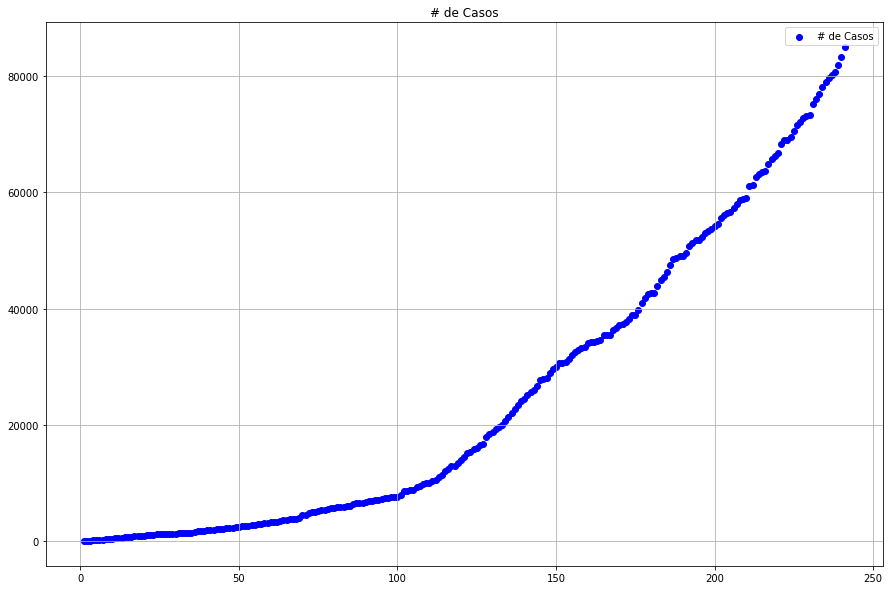

In [111]:
from sklearn.linear_model import LinearRegression

xl=x
yl=y
ndf1l=ndf1
def f(x):  # función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano
    np.random.seed(42) # para poder reproducirlo
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

#y=ndf1.values # calculamos y a partir de la función que hemos generado
# hacemos un gráfico de los datos que hemos generado
plt.figure(figsize=(15, 10))
plt.scatter(xl,yl,label='# de Casos', color='blue')
plt.grid(True)
plt.legend()
plt.title('# de Casos');

In [112]:
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(xl.reshape(-1,1), yl) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_[0]) + ', b = ' + str(regresion_lineal.intercept_))
# resultado: w = [0.09183522], b = 1.2858792525736682
if (regresion_lineal.intercept_ < 0):
    ecua='y = {}x {}'
else:
    ecua='y = {}x + {}'
print(ecua.format(regresion_lineal.coef_[0],regresion_lineal.intercept_))

w = 337.95967216487776, b = -15817.67634854772
y = 337.95967216487776x -15817.67634854772


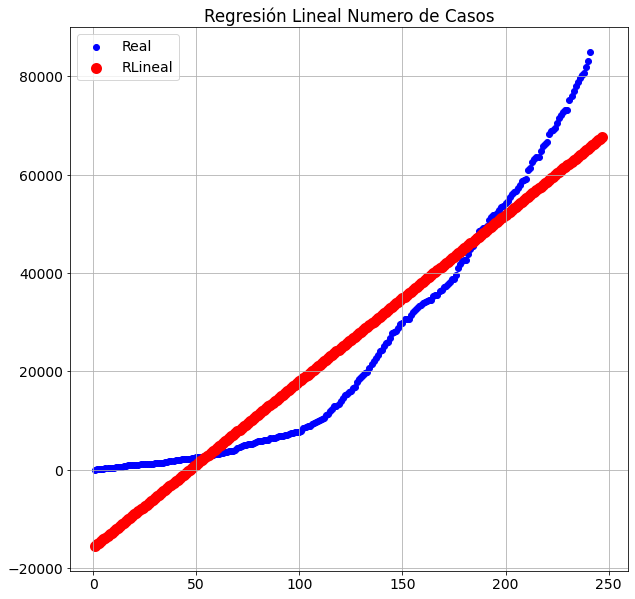

In [131]:
fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_
plt.figure(figsize=(10, 10))
plt.scatter(xl,yl,label='Real', color='blue')
plt.grid(True)
plt.title('Regresión Lineal Numero de Casos');
x1=np.arange(1,len(ndf1l)+7,1)
y1=fun(x1)
plt.scatter(x1,y1,color='red',linewidth=5.0,label='RLineal')
plt.legend()
plt.show()

## Regresión Logaritmica

In [114]:
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression

xlog=x
ylog=y
ndf1log=ndf1

def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,xlog,ylog) #Extraemos los valores de los paramatros

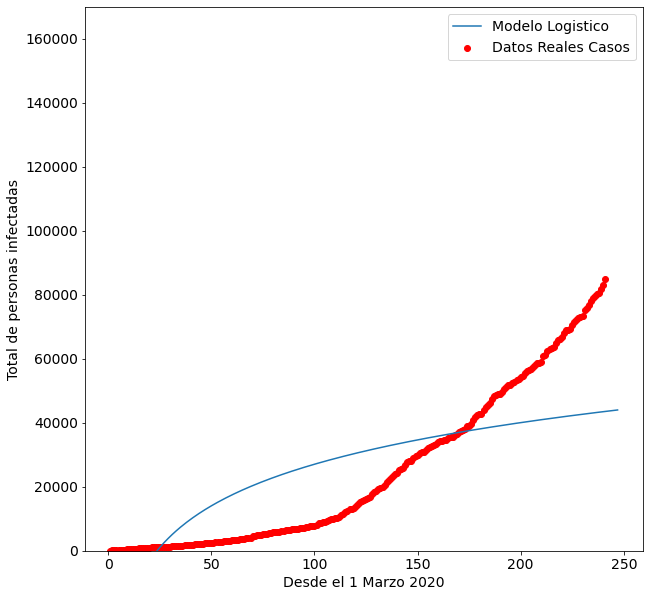

Lineal:  44003.88329931214


In [129]:
pred_x = list(range(min(xlog),max(xlog)+7)) # Predecir 7 dias mas
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=14)
# Real data
plt.scatter(xlog,ylog,label="Datos Reales Casos",color="red")
# Predicted exponential curve
pred_y=[modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
plt.plot(pred_x, pred_y, label="Modelo Logistico" )
plt.legend()
plt.ylabel("Total de personas infectadas")
plt.ylim(0,max(y)*2) # Definir los limites de Y
plt.show()

# Modelo Exponencial

[0.02233828 6.57826351]
Lineal:  84924.0


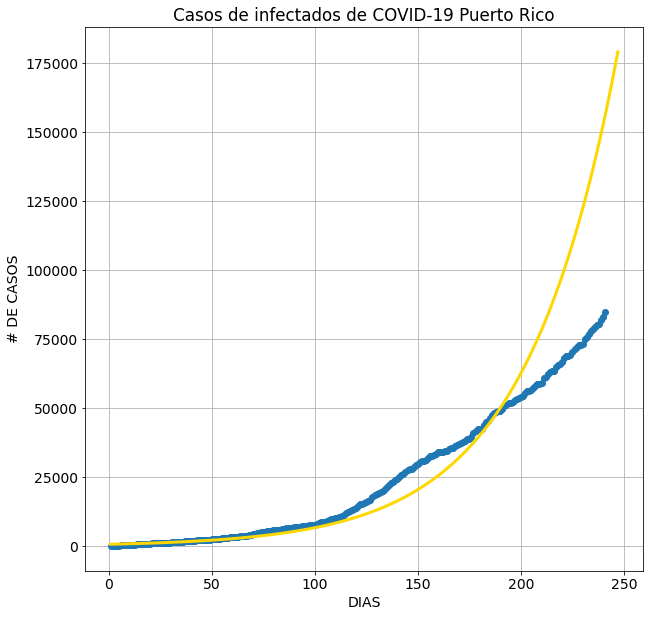

In [124]:
xexp=x
yexp=y
ndf1exp=ndf1

curve_fit=np.polyfit(xexp,np.log(yexp),1)
print(curve_fit)
pred_xe=np.array(list(range(min(xexp),max(xexp)+7)))
yx=np.exp(curve_fit[1])*np.exp(curve_fit[0]*pred_xe)
plt.title('Casos de infectados de COVID-19 Puerto Rico')
plt.plot(xexp,yexp,"o")
plt.plot(pred_xe,yx,color='gold',linewidth=3.0)
plt.xlabel('DIAS')
plt.ylabel('# DE CASOS')
plt.grid(True)

## Modelo Polinomial

            4           3          2
-3.078e-05 x + 0.01474 x - 0.4362 x + 15.53 x + 663.6


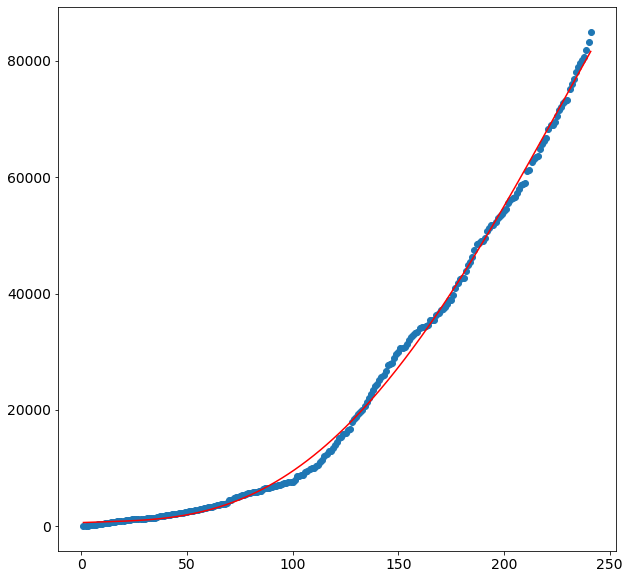

Lineal:  84924.0


In [125]:
xpol=x
ypol=y
polndf1=ndf1
#Numero de Casos
fun1 = np.poly1d(np.polyfit(xpol, ypol, 4))
print(fun1)
y_pred=fun1(xpol)
plt.scatter(xpol, ypol)
plt.plot(xpol, y_pred, c='r')  
plt.show()

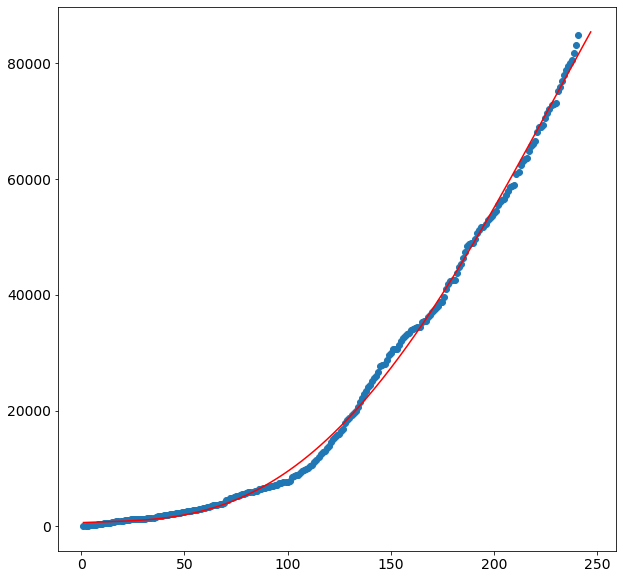

In [118]:
pred=np.array(list(range(min(xexp),max(xexp)+7)))
y_npred=fun1(pred)
plt.scatter(xpol, ypol)
plt.plot(pred, y_npred, c='r')
plt.show()

# Método Probabilistico

In [147]:
xpro=x
ypro=y
prondf1=ndf1

media = prondf1.values[:,1].mean()
mediana = np.median(prondf1.values[:,1])
print("MEDIA: ",media)
print("MEDIANA: ",mediana)

MEDIA:  25075.44398340249
MEDIANA:  14540.0


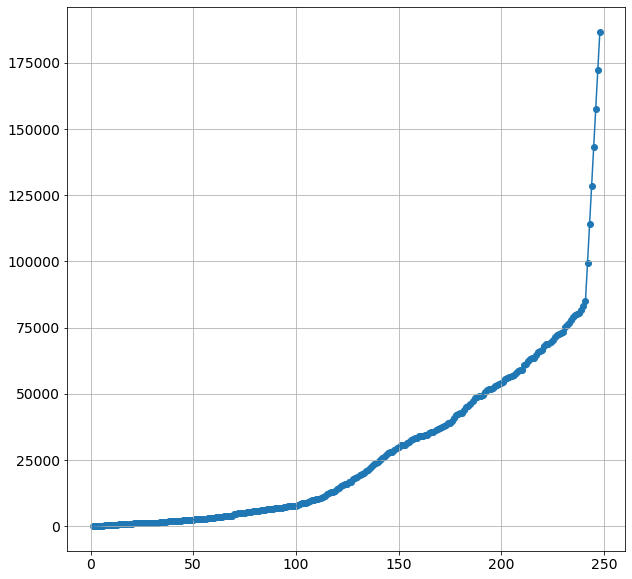

In [148]:
for it in range(int(xpro[-1]), int(xpro[-1]+7)):
    xpro=np.append(xpro,(it+1))
    ypro=np.append(ypro,ypro[-1] + mediana)
plt.plot(xpro,ypro)
plt.scatter(xpro,ypro)
plt.grid(True)
plt.show()

## Datos despues de 7 días

In [149]:
print("Lineal: ", y1[len(y1)-1])
print("Logistica: ", pred_y[len(pred_y)-1])
print("Exponencial: ", yx[len(yx)-1])
print("Polinomial: ", y_npred[len(y_npred)-1])
print("Probabilistico: ", ypro[len(ypro)-1])

Lineal:  67658.36267617709
Logistica:  44003.88329931214
Exponencial:  179121.51387289123
Polinomial:  85457.13900143556
Probabilistico:  186704.0


<ul>
    <li><b>Cual tiene una mejor prediccion.</b>
        <p>
            El modelo polinomial.
        </p>
    </li>
    <li><b>Ventajas y desventajas de los modelos.</b>
        <ul>
            <li> Modelo Lineal
                <ul>
                    <li>Ventajas
                        <ul>
                            <li>Fácil de entender y explicar, lo que puede ser muy valioso para las decisiones de negocios.</li>
                            <li>Es rápido de modelar y es particularmente útil cuando la relación a modelar no es extremadamente compleja y no tiene mucha información.</li>
                        </ul>
                    </li>
                    <li>Desventajas
                        <ul>
                            <li>No se puede modelar relaciones complejas.
</li>
                            <li>No se pueden capturar relaciones no lineales sin transformar la entrada, por lo que tienes que trabajar duro para que se ajuste a funciones no lineales.</li>
                        </ul>
                    </li>
                </ul>
            </li>
            <li> Modelo Logaritmico
                <ul>
                    <li>Ventajas
                        <ul>
                            <li>Fácil de entender y explicar.</li>
                            <li>Rara vez existe sobreajuste.</li>
                            <li>Rápido para entrenar.</li>
                        </ul>
                    </li>
                    <li>Desventajas
                        <ul>
                            <li>Tienes que trabajar duro para que se ajuste a los datos no lineales.</li>
                            <li>En algunas ocasiones es muy simple para captar relaciones complejas entre variables.</li>
                        </ul>
                    </li>
                </ul>
            </li>
            <li> Modelo Exponencial
                <ul>
                    <li>Ventajas
                        <ul>
                            <li>Proporciona información adecuada justamente porque están diseñadas para valores y crecimientos rápidos.</li>
                        </ul>
                    </li>
                    <li>Desventajas
                        <ul>
                            <li>No tiende a disminuir a futuro, sigue aumentando.</li>
                            <li>Sin embargo matemáticamente son muy difícil de desarrollar y en algunos casos complican todo un proceso matemático para obtener resultados.</li>
                        </ul>
                    </li>
                </ul>
            </li>
            <li> Modelo Polinomial
                <ul>
                    <li>Ventajas
                        <ul>
                            <li>Funciona con cualquier tamaño de muestra.</li>
                            <li>Trabaja bien sobre datos no lineales.</li>
                        </ul>
                    </li>
                    <li>Desventajas
                        <ul>
                            <li>
                                Se requiere elegir el grado correcto del polinomio para una buena relación sesgo/varianza.
                            </li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </li>
    <li><b>Cual es el principal problema del modelo probabilistico.</b>
         <p>
            Qué trabaja adecuadamente para valores pequeños, pero cuando se trata de valores grandes o que varias bastante entre cada uno, este se toma a cometer un error muy elevado que no sirve para predecir de forma correcta.
        </p>
    </li>
</ul>